In [47]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import os

In [48]:
import importlib
import plot, loaders
plot = importlib.reload(plot)
loaders = importlib.reload(loaders)

In [63]:
PLOT_THICKENS = False
if PLOT_THICKENS:
    # sns.plotting_context("talk")
    CUSTOM_SNS_RC = {'xtick.labelsize': 13.5, 'ytick.labelsize': 13.5, 'legend.fontsize': 13.0, 
                                                 'axes.labelsize': 14, 'axes.titlesize': 15}
    # sns.set_context("paper", font_scale=1.4, rc=CUSTOM_SNS_RC)
    sns.set_context("talk", font_scale=1, rc=CUSTOM_SNS_RC)
# else:
#     CUSTOM_SNS_RC = {'xtick.labelsize': 8, 'ytick.labelsize': 8, 'legend.fontsize': 7.5, 
#                      'axes.labelsize': 9, 'axes.titlesize': 9}
#     sns.set_context("paper", font_scale=1, rc=CUSTOM_SNS_RC)
sns.set_context("paper")
plt.rcParams['xtick.major.pad']= '0'
plt.rcParams['ytick.major.pad']= '1'
plt.rcParams['legend.fontsize'] = '7.5'

In [51]:
PGS_DIR = os.path.join("data", "pgs")
SAVE_FIG_DIR = "sanity_check"

# Compare parents-offspring PGS distribution

In [52]:
ecdf = False
mutual_bins = True
xlabel = ""
annotate = False

## Longevity

In [53]:
longevity_height = loaders.load_pgs(os.path.join(PGS_DIR, "longevity_height"))
longevity_so_random_10_height = loaders.load_pgs(os.path.join(PGS_DIR, "longevity_so_random_10_height"))
longevity_so_actual_10_height = loaders.load_pgs(os.path.join(PGS_DIR, "longevity_so_actual_10_height"))
longevity_so_random_50_height = loaders.load_pgs(os.path.join(PGS_DIR, "longevity_so_random_50_height"))
longevity_so_actual_50_height = loaders.load_pgs(os.path.join(PGS_DIR, "longevity_so_actual_50_height"))

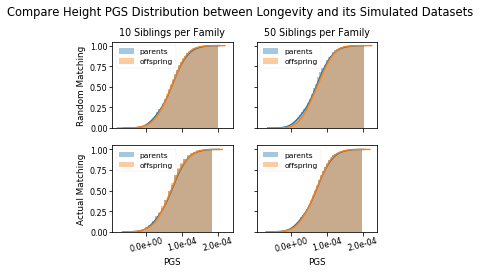

In [64]:
# each column is 10/50 siblings each row is random/actual
fig, ax = plt.subplots(2, 2, figsize=(4.75, 3.5), sharex=True, sharey=True)

plot.display_distribution_differences(x=longevity_height.rename("parents"), 
                                      y=longevity_so_random_10_height.rename("offspring"),
                                      ax=ax[0, 0],
                                      mutual_bins=mutual_bins, ecdf=ecdf, xlabel=xlabel, annotate=False)
plot.display_distribution_differences(x=longevity_height.rename("parents"), 
                                      y=longevity_so_random_50_height.rename("offspring"),
                                      ax=ax[0, 1],
                                      mutual_bins=mutual_bins, ecdf=ecdf, xlabel=xlabel, annotate=False)
plot.display_distribution_differences(x=longevity_height.rename("parents"), 
                                      y=longevity_so_actual_10_height.rename("offspring"),
                                      ax=ax[1, 0],
                                      mutual_bins=mutual_bins, ecdf=ecdf, xlabel=xlabel, annotate=False)
plot.display_distribution_differences(x=longevity_height.rename("parents"), 
                                      y=longevity_so_actual_50_height.rename("offspring"),
                                      ax=ax[1, 1],
                                      mutual_bins=mutual_bins, ecdf=ecdf, xlabel=xlabel, annotate=False)

ax[0, 0].set_title("10 Siblings per Family")
ax[0, 1].set_title("50 Siblings per Family")
ax[0, 0].set_ylabel("Random Matching")
ax[1, 0].set_ylabel("Actual Matching")
ax[1, 0].set_xlabel("PGS")
ax[1, 1].set_xlabel("PGS")

ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=15)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=15)
ax[1, 0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax[1, 1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))


suptitle = "Compare Height PGS Distribution between Longevity and its Simulated Datasets"
if PLOT_THICKENS:
    fig.suptitle(suptitle, fontsize=17, y=0.96)
else:
    fig.suptitle(suptitle, y=1.02)


In [66]:
plot.save_fig(fig, "longevity_parents-offspring_pgs-dist-comp" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)

## ASPIS

In [67]:
aspis_gcf = loaders.load_pgs(os.path.join(PGS_DIR, "aspis_gcf"))
aspis_so_random_10_gcf = loaders.load_pgs(os.path.join(PGS_DIR, "aspis_so_random_10_gcf"))
aspis_so_random_50_gcf = loaders.load_pgs(os.path.join(PGS_DIR, "aspis_so_random_50_gcf"))

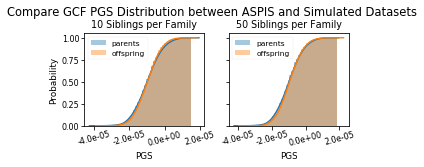

In [72]:
# each column is 10/50 siblings
fig, ax = plt.subplots(1, 2, figsize=(4.75, 1.7), sharey=True)

plot.display_distribution_differences(x=aspis_gcf.rename("parents"), 
                                      y=aspis_so_random_10_gcf.rename("offspring"),
                                      ax=ax[0],
                                      mutual_bins=mutual_bins, ecdf=ecdf, xlabel=xlabel, annotate=False)
plot.display_distribution_differences(x=aspis_gcf.rename("parents"), 
                                      y=aspis_so_random_50_gcf.rename("offspring"),
                                      ax=ax[1],
                                      mutual_bins=mutual_bins, ecdf=ecdf, xlabel=xlabel, annotate=False)

ax[0].set_title("10 Siblings per Family")
ax[1].set_title("50 Siblings per Family")
ax[0].set_ylabel("Probability")
for a in ax:
    a.set_xlabel("PGS")
    a.set_xticklabels(a.get_xticklabels(), rotation=15)
    a.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

suptitle = "Compare GCF PGS Distribution between ASPIS and Simulated Datasets"
if PLOT_THICKENS:
    fig.suptitle(suptitle, fontsize=10, y=1.15)
else:
    fig.suptitle(suptitle, y=1.10)

In [73]:
plot.save_fig(fig, "aspis_parents-offspring_pgs-dist-comp" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)